# **TALLER DE PCA**

Taller # 1
Utilizar dataset blue jays

1.   Realizar analisis bivariado todos contra todos tal como se explicó
2.   Interpretar resultados del analisis bivariado
1.   Calcule la matriz de covarianza y sus valores y vectores propios (discuta los resultados con su grupo)
2.   Determine cuantos y cuales componentes son necesarios para describir el 90% de la varianza de los datos









## IMPORTS AND DEFINITIONS

Utilizamos np para las operaciones numericas, sns y plt para la creación de los gráficos estadisticos y mapas de calor y pandas para la manipulación y análisis de los datos.

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Creamos la clase PCA para trabajar de manera modular

In [5]:
class PCA:

    def __init__(self, n_componentes = 2):
      #Colocamos 2 para que se proyecte en 2 dimensiones

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None


    def estandarizar(self, data):
        # Convertimos a una escala comparable restando la media de cada característica y se dividiendola entre la desviación estándar

        z = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
        return z


    def calc_matriz_covarianza(self):
      #Gracias a la estandarización de los datos, simplificamos la relación entre variables

        covmat = np.cov(self.datos_estandarizados.T)
        return covmat

    def valores_vectores_propios(self, covmat):
        # Se calculan los valores y vectores propios de la matriz de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)
        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        # Se seleccionan los índices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]
        # Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:, n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig, ax = plt.subplots(1, 1, figsize=(10,6))
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )
        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):
        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)
        covmat = self.calc_matriz_covarianza()
        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)
        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)
        datos_proyectados = self.proyectar(self.vector_caracteristica)
        return datos_proyectados

## CARGA DE DATABASE

In [6]:
# CargaMOS el dataset blue_jays.csv
df = pd.read_csv("/content/blue_jays.csv")

# MostraMOS las primeras filas y la descripción estadística
print("Primeras filas del dataset:")
print(df.head())
print("\nDescripción Estadística:")
print(df.describe())

Primeras filas del dataset:
      bird_id sex  bill_depth_mm  bill_width_mm  bill_length_mm  \
0  0000-00000   M           8.26           9.21           25.92   
1  1142-05901   M           8.54           8.76           24.99   
2  1142-05905   M           8.39           8.78           26.07   
3  1142-05907   F           7.78           9.30           23.48   
4  1142-05909   M           8.71           9.84           25.47   

   head_length_mm  body_mass_g  skull_size_mm  
0           56.58        73.30          30.66  
1           56.36        75.10          31.38  
2           57.32        70.25          31.25  
3           53.77        65.50          30.29  
4           57.32        74.90          31.85  

Descripción Estadística:
       bill_depth_mm  bill_width_mm  bill_length_mm  head_length_mm  \
count      123.00000     123.000000      123.000000      123.000000   
mean         8.23374       9.217724       24.838780       55.693577   
std          0.39019       0.533496       

## ANÁLISIS BIVARIADO

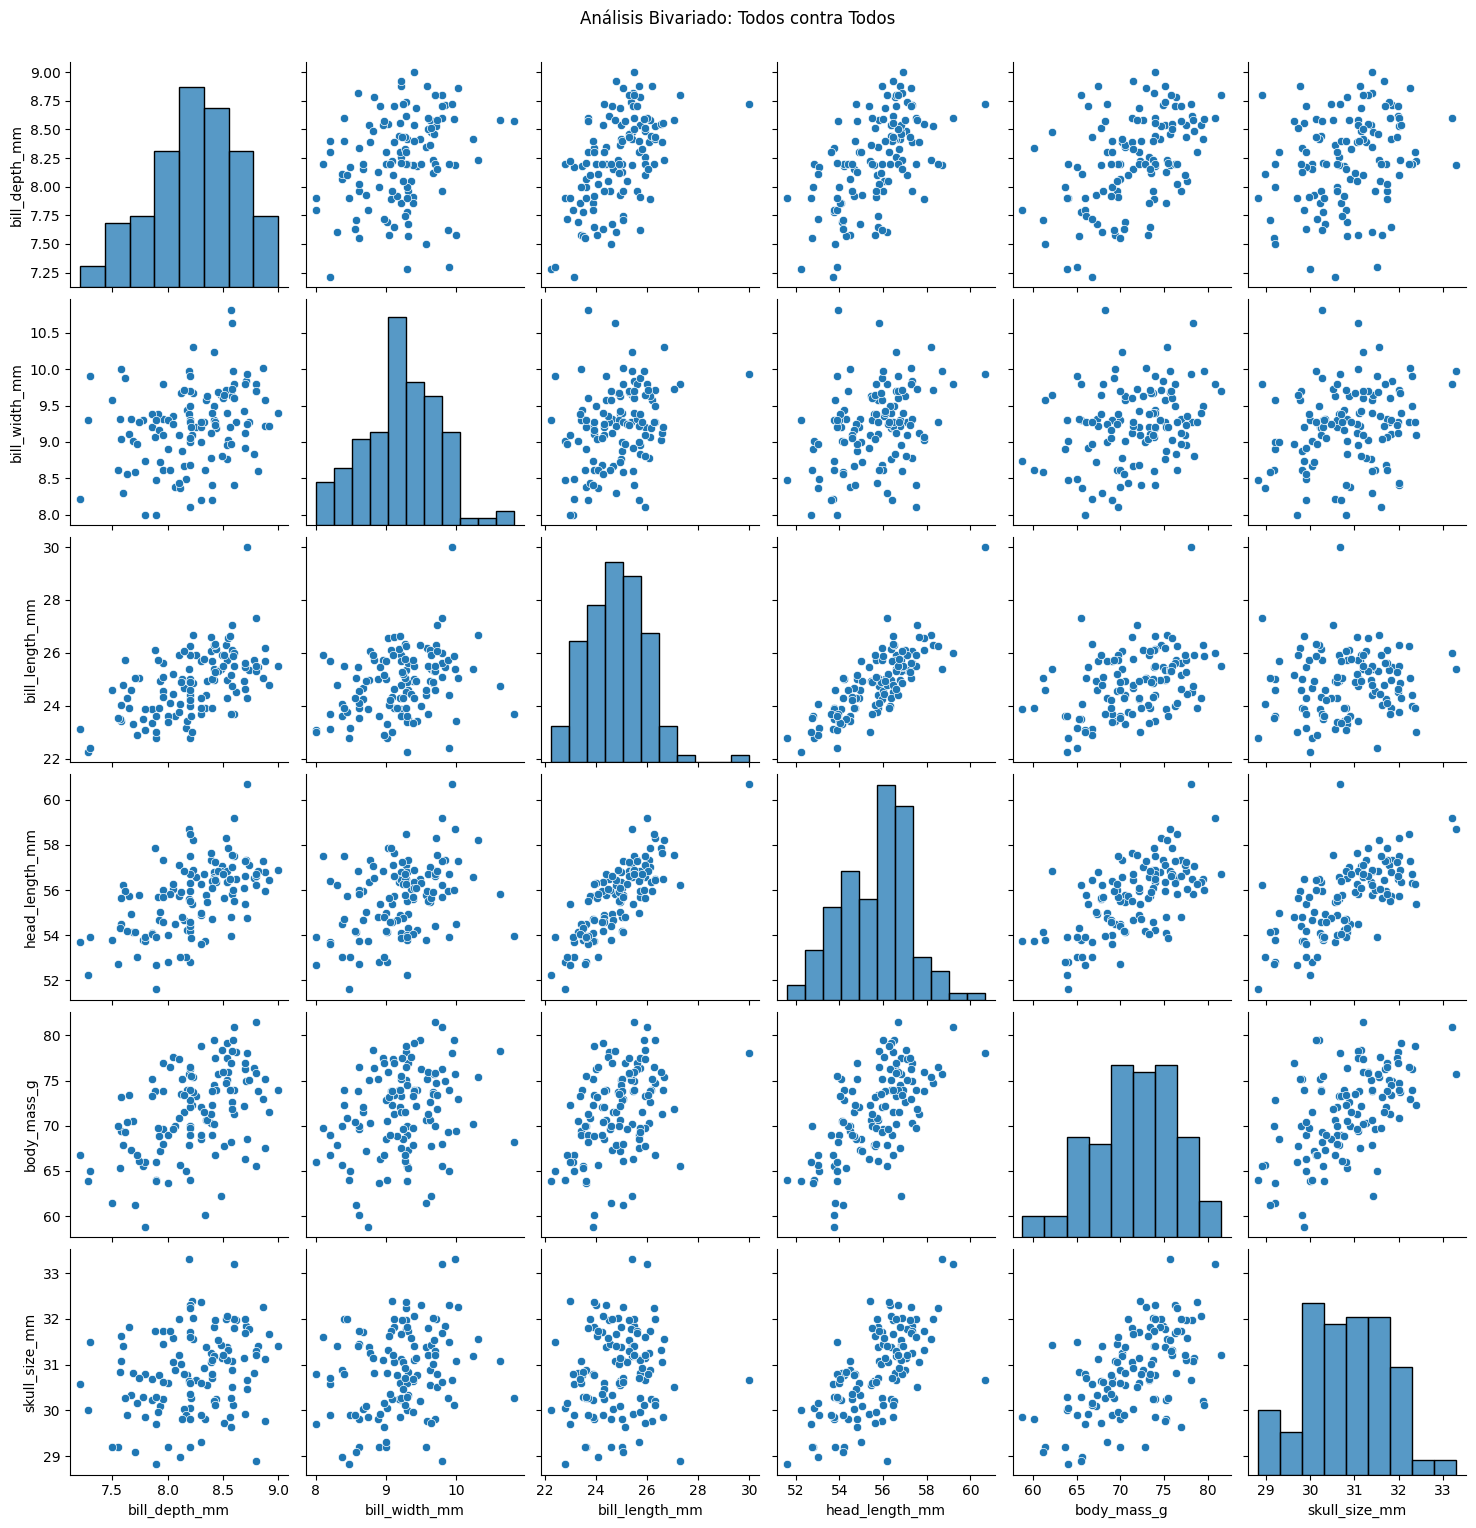

In [7]:
# Seleccionamos las columnas numéricas (excluyendo 'bird_id' y 'sex')
data_numeric = df.drop(columns=['bird_id', 'sex'])

# Utilizamos Pairplot para visualizar todos contra todos
sns.pairplot(data_numeric)
plt.suptitle("Análisis Bivariado: Todos contra Todos", y=1.02)
plt.show()

### Mapa de Calor matriz de correlación
 Esta matriz no ayuda a entender graficamente si dos variables tienen una correlación alta lo que signifa que tienen información similar

De esta manera logramos entender que variables eliminar.

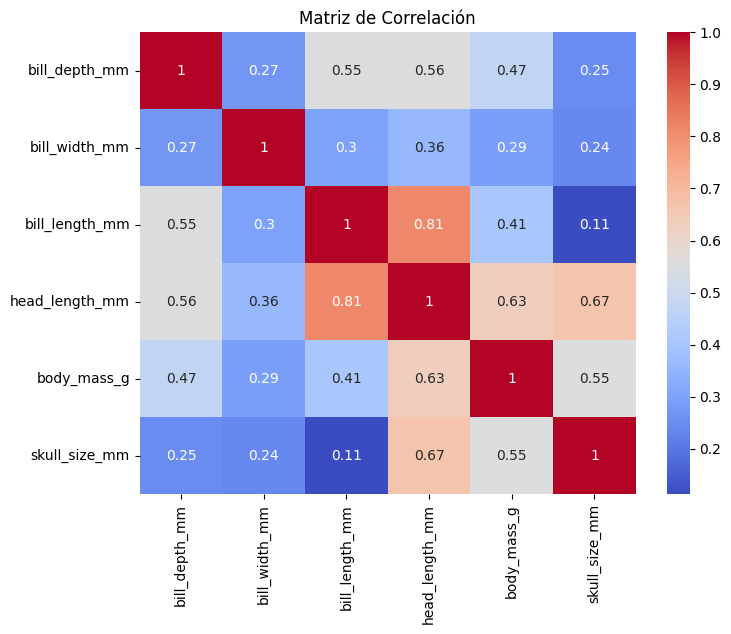

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

Con el grafico del analisis bivariado Todos contra Todos y el mapa de calor de la matriz de correlación podemos analizar con mayor claridad a través de PCA cuales son las caracteristicas en este caso de los Pajaros (Aunque sin ahondar en esa base de datos pues no es el objetivo) que tienen información muy similar y por lo tanto podemos eliminar y así simplificar la presentación de la información en el gráfico final. Observamos por ejemplo que las variables bill_length_mm, head_length_mm y skull_size_mm forman patrones alineados en los gráficos de dispersión lo que indica que están altamente relacionados.

Con la matriz de calor podemos observar con mas claridad estos patrones en forma de colores, indicando su correlacionalidad. Para su posterior aplicación en PCA.

##APLICACIÓN DE PCA

In [12]:
data = data_numeric.values

target = df['sex']

pca = PCA(n_componentes=2)
datos_pca = pca.run(data)

print("% de varianza descrita por cada caracteristica")
print(pca.valores_propios / np.sum(pca.valores_propios) * 100)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]
% de varianza descrita por cada caracteristica
[5.41041805e+01 1.67222092e+01 1.34528368e+01 9.03948351e+00
 6.68126020e+00 2.98275630e-05]


###Componentes necesarios para explicar el 90% de la varianza

In [10]:
# Ordenamos los valores de mayor a menor
sorted_indices = np.argsort(pca.valores_propios)[::-1]
valores_ordenados = pca.valores_propios[sorted_indices]

# Calculamos por cada componente la varianza y la varianza acumulada
varianza_explicada = valores_ordenados / np.sum(pca.valores_propios)
varianza_acumulada = np.cumsum(varianza_explicada)
print("Varianza acumulada:", varianza_acumulada)

# Determinamos el númeor de componentes necesarios para cumplir con el 90%
n_componentes_90 = np.argmax(varianza_acumulada >= 0.90) + 1  # +1 por índice cero
print("Número de componentes necesarios para explicar el 90% de la varianza:", n_componentes_90)

Varianza acumulada: [0.5410418  0.7082639  0.84279226 0.9331871  0.9999997  1.        ]
Número de componentes necesarios para explicar el 90% de la varianza: 4


## Presentación de la gráfica

(123, 2)


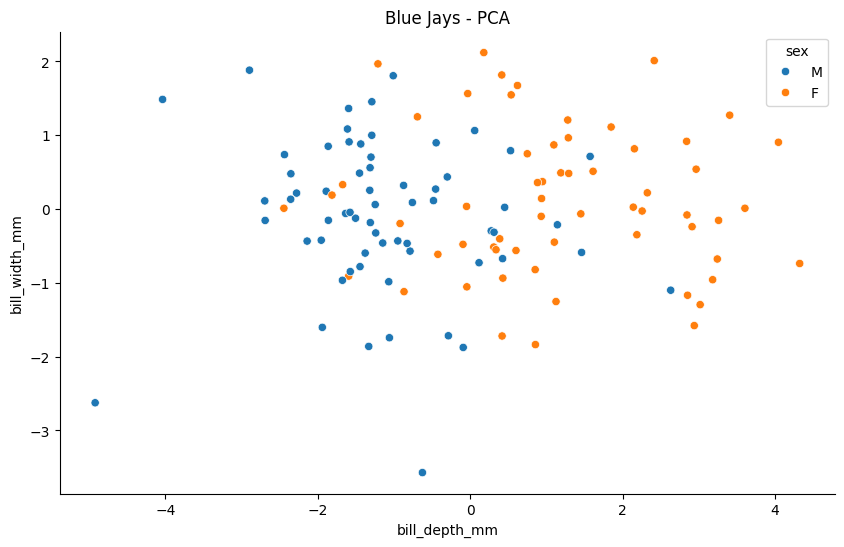

In [11]:
# En este caso utilizamos los dos primeros nombres de columnas numéricas
features = data_numeric.columns[:2]
pca.dibujar("Blue Jays - PCA", features, target, datos_pca)
